In [1]:
import pandas as pd

In [2]:
PREFIX_DATA_PATH = '../data/'
df = pd.read_parquet(f'{PREFIX_DATA_PATH}/12_04_24.parquet')

# df = df[df['document_type'] == 'Conference Paper']
df

FileNotFoundError: [Errno 2] No such file or directory: '../data//12_04_24.parquet'

In [ ]:
print(df.iloc[:2].to_string())

                    doi                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### EDA

In [ ]:
df.columns

Index(['doi', 'abstract', 'affiliation', 'author_affiliation',
       'author_details', 'author_given_name', 'author_keywords',
       'author_surname', 'author_url', 'cited_by', 'delivered_date',
       'document_type', 'funding_details', 'language', 'open_access',
       'publication_date', 'publisher', 'ref_count', 'source_title',
       'source_type', 'status_state', 'subject_abbrev', 'subject_area',
       'subject_code', 'subject_name', 'title'],
      dtype='object')

In [ ]:
df[['source_type', 'document_type']].value_counts()

source_type            document_type   
Journal                Article             15401
Conference Proceeding  Conference Paper     1222
Journal                Review               1018
Book                   Book Chapter          301
Book Series            Conference Paper      247
Journal                Letter                189
                       Erratum               132
Book Series            Book Chapter          119
Journal                Note                  105
                       Editorial              85
                       Conference Paper       72
                       Data Paper             26
                       Short Survey           21
Book                   Book                   20
Conference Proceeding  Editorial              17
Book Series            Article                11
Conference Proceeding  Article                10
Book                   Editorial               4
Book Series            Review                  3
Trade Journal          Articl

In [ ]:
unusual_papers = df[(df['document_type'] == 'Conference Paper') & (df['source_type'] != 'Conference Proceeding')]
unusual_papers

,doi,abstract,affiliation,author_affiliation,author_details,author_given_name,author_keywords,author_surname,author_url,cited_by,...,publisher,ref_count,source_title,source_type,status_state,subject_abbrev,subject_area,subject_code,subject_name,title
61,10.2217/fvl-2018-0017,The 20th Bangkok International Symposium on HI...,"[{""affiliation-city"":""Bangkok"",""@id"":""60031780...","[{""@id"":""60016965"",""@href"":""https://api.elsevi...","[true,7004982661,19,[{""@id"":""60016965"",""@href""...",Praphan,"[{""@_fa"":""true"",""$"":""comorbidities""},{""@_fa"":""...",Phanuphak,https://api.elsevier.com/content/author/author...,0.0,...,Future Medicine Ltd.info@futuremedicine.com,9.0,Future Virology,Journal,update,IMMU,"[Virology,true,IMMU,2406]",2406,Virology,HIV medicine as double-sided sword: Care and p...
302,10.1097/PHM.0000000000001230,Multiple acyl-CoA dehydrogenase deficiency is ...,"[{""affiliation-city"":""Bangkok"",""@id"":""60028190...","[{""@id"":""60022183"",""@href"":""https://api.elsevi...","[true,6603597652,4,[{""@id"":""60022183"",""@href"":...",Sungkom,"[{""@_fa"":""true"",""$"":""EMG""},{""@_fa"":""true"",""$"":...",Jongpiputvanich,https://api.elsevier.com/content/author/author...,2.0,...,Lippincott Williams and Wilkinskathiest.clai@a...,22.0,American Journal of Physical Medicine and Reha...,Journal,update,MEDI,"[Rehabilitation,true,MEDI,2742]",2742,Rehabilitation,"Needle EMG, a Jigsaw to disclose lipid storage..."
355,10.1007/978-981-15-0399-3_27,Elections are the most important part in the d...,"{""affiliation-city"":""Bangkok"",""@id"":""60028190""...","{""@id"":""60028190"",""@href"":""https://api.elsevie...","[true,6603187694,2,{""@id"":""60028190"",""@href"":""...",Duangdao,"[{""@_fa"":""true"",""$"":""Election""},{""@_fa"":""true""...",Wichadakul,https://api.elsevier.com/content/author/author...,3.0,...,Springer,20.0,Communications in Computer and Information Sci...,Book Series,update,MATH,"[Mathematics (all),true,MATH,2600]",2600,Mathematics (all),2019 Thai General Election: A Twitter Analysis
406,10.3233/978-1-61499-834-1-216,This paper presents a global sharing analysis ...,"[{""affiliation-city"":""Bangkok"",""@id"":""60028190...","{""@id"":""60028190"",""@href"":""https://api.elsevie...","[true,6507533884,5,{""@id"":""60028190"",""@href"":""...",Sompop,"[{""@_fa"":""true"",""$"":""5D World Map Systems""},{""...",Rungsupa,https://api.elsevier.com/content/author/author...,1.0,...,IOS PressNieuwe Hemweg 6BAmsterdam1013 BG,8.0,Frontiers in Artificial Intelligence and Appli...,Book Series,update,COMP,"[Artificial Intelligence,true,COMP,1702]",1702,Artificial Intelligence,Global sharing analysis and visualization of w...
527,10.1007/978-981-15-1465-4_35,User credentials often serve as an entry point...,"{""affiliation-city"":""Bangkok"",""@id"":""60028190""...","{""@id"":""60028190"",""@href"":""https://api.elsevie...","[true,56032668700,2,{""@id"":""60028190"",""@href"":...",Yachai,"[{""@_fa"":""true"",""$"":""Elastic stack""},{""@_fa"":""...",Limpiyakorn,https://api.elsevier.com/content/author/author...,0.0,...,Springer,10.0,Lecture Notes in Electrical Engineering,Book Series,update,ENGI,"[Industrial and Manufacturing Engineering,true...",2209,Industrial and Manufacturing Engineering,Exploring Network Vulnerabilities for Corporat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18800,10.1007/978-3-030-21920-8_29,A hexagonal fuzzy number (HFN) with its member...,"[{""affiliation-city"":""Bangkok"",""@id"":""60028190...","{""@id"":""60028190"",""@href"":""https://api.elsevie...","[true,24768274800,2,{""@id"":""60028190"",""@href"":...",Phantipa,"[{""@_fa"":""true"",""$"":""Hexagonal fuzzy number""},...",Thipwiwatpotjana,https://api.elsevier.com/content/author/author...,1.0,...,Springer Verlagservice@springer.de,23.0,Advances in Intelligent Systems and Computing,Book Series,update,COMP,"[Computer Science (all),true,COMP,1700]",1700,Computer Science (all),A Ranking 

In [ ]:
df[(df['document_type'] == 'Conference Paper') & (df['source_type'] == 'Conference Proceeding')]

,doi,abstract,affiliation,author_affiliation,author_details,author_given_name,author_keywords,author_surname,author_url,cited_by,...,publisher,ref_count,source_title,source_type,status_state,subject_abbrev,subject_area,subject_code,subject_name,title
37,10.1088/1742-6596/2175/1/012001,Copper foils are widely used as a substrate fo...,"[{""affiliation-city"":""Bangkok"",""@id"":""60028190...","{""@id"":""60028190"",""@href"":""https://api.elsevie...","[true,6602333803,7,{""@id"":""60028190"",""@href"":""...",Sakuntam,None,Sanorpim,https://api.elsevier.com/content/author/author...,0.0,...,IOP Publishing Ltd,24.0,Journal of Physics: Conference Series,Conference Proceeding,update,PHYS,"[Physics and Astronomy (all),true,PHYS,3100]",3100,Physics and Astronomy (all),Effect of Chemical Treatment and Thermal Annea...
44,10.1109/JCSSE58229.2023.10201942,Using automatic speech recognition (ASR) to tr...,"{""affiliation-city"":""Bangkok"",""@id"":""60028190""...","{""@id"":""60028190"",""@href"":""https://api.elsevie...","[true,12785303000,8,{""@id"":""60028190"",""@href"":...",Atiwong,None,Suchato,https://api.elsevier.com/content/author/author...,0.0,...,Institute of Electrical and Electronics Engine...,17.0,Proceedings of JCSSE 2023 - 20th International...,Conference Proceeding,update,COMP,"[Software,true,COMP,1712]",1712,Software,0.01 Cent per Second: Developing a Cloud-based...
90,10.1088/1755-1315/835/1/012009,The discovery of an areally limited outcrop of...,"[{""affiliation-city"":""Bangkok"",""@id"":""60028190...","{""@id"":""60028190"",""@href"":""https://api.elsevie...","[true,57288293100,5,{""@id"":""60028190"",""@href"":...",Sannaporn,None,Sanguankaew,https://api.elsevier.com/content/author/author...,0.0,...,IOP Publishing Ltd,8.0,IOP Conference Series: Earth and Environmental...,Conference Proceeding,new,EART,"[Earth and Planetary Sciences (all),true,EART,...",1900,Earth and Planetary Sciences (all),Blueschists and Blue Amphibole Schists-Gneisse...
107,10.1088/1755-1315/463/1/012069,The adsorption of wastewater from various indu...,"[{""affiliation-city"":""Bangkok"",""@id"":""60028190...","{""@id"":""60091569"",""@href"":""https://api.elsevie...","[true,57215840239,5,{""@id"":""60091569"",""@href"":...",N.,"[{""@_fa"":""true"",""$"":""Activated carbon""},{""@_fa...",Khantikulanon,https://api.elsevier.com/content/author/author...,2.0,...,Institute of Physics Publishinghelen.craven@io...,7.0,IOP Conference Series: Earth and Environmental...,Conference Proceeding,update,EART,"[Earth and Planetary Sciences (all),true,EART,...",1900,Earth and Planetary Sciences (all),Efficiency of zinc ions (II) adsorption using ...
114,10.1109/SNPD.2019.8935680,A timed Petri nets would practically represent...,"{""affiliation-city"":""Bangkok"",""@id"":""60028190""...","{""@id"":""60028190"",""@href"":""https://api.elsevie...","[true,6507688023,2,{""@id"":""60028190"",""@href"":""...",Wiwat,"[{""@_fa"":""true"",""$"":""Event-B""},{""@_fa"":""true"",...",Vatanawood,https://api.elsevier.com/content/author/author...,0.0,...,Institute of Electrical and Electronics Engine...,10.0,Proceedings - 20th IEEE/ACIS International Con...,Conference Proceeding,update,DECI,"[Information Systems and Management,true,DECI,...",1802,Information Systems and Management,Transformation of Bounded Timed Petri Nets int...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,10.1109/EMBC46164.2021.9629861,Alzheimer's Disease (AD) and Mild Cognitive Im...,"[{""affiliation-city"":""Pathum Thani"",""@id"":""600...","{""@id"":""127717402"",""@href"":""https://api.elsevi...","[true,16069886900,10,{""@id"":""127717402"",""@href...",C.,None,Tantibundhit,https://api.elsevier.com/content/author/author...,0.0,...,Institute of Electrical and Electronics Engine...,24.0,Proceedings of the Annual International Confer...,Conference Proceeding,update,MEDI,"[Health Informatics,true,MEDI,2718]",2718,Health Informatics,Development of Thai Picture Des

### Format of the data

#### V1 (label from keyword)

In [ ]:
def classify_full_conference_papers(df):
    """
    Classifies only full conference papers, excluding workshops, symposiums, and other
    similar events. This classifier aims to identify papers from established conference
    proceedings with formal peer review processes.

    Parameters:
    df (pandas.DataFrame): DataFrame containing Scopus publication data

    Returns:
    tuple: (DataFrame with classification, statistics dictionary)
    """
    analysis_df = df.copy()

    # Terms that indicate full conference papers
    conference_indicators = [
        "international conference on",
        "proceedings of the",
        "annual conference",
        "international conference in",
        "international conference of",
    ]

    # Terms that should exclude a paper
    exclusion_terms = [
        "workshop",
        "symposium",
        "seminar",
        "colloquium",
        "tutorial",
        "short paper",
        "poster",
        "abstract only",
        "extended abstract",
        "work in progress",
    ]

    def is_full_conference_paper(row):
        """
        Determines if a publication is a full conference paper based on multiple criteria.
        """
        source_title = str(row.get("source_title", "")).lower()
        # publisher = str(row.get("publisher", "")).lower()
        source_type = str(row.get("source_type", "")).lower()

        # Check for exclusion terms first
        if any(term in source_title.lower() for term in exclusion_terms):
            return False

        # Verify it's marked as a conference publication
        if "conference proceeding" not in source_type:
            return False

        # Check for conference indicators
        has_conference_indicator = any(
            indicator in source_title.lower()
            for indicator in conference_indicators
        )

        # Additional quality checks
        ref_count = float(row.get("ref_count", 0))
        has_minimum_references = (
            ref_count >= 5
        )  # Most full papers have substantial references

        # Final classification
        is_conference = (
            has_conference_indicator
            and has_minimum_references
            and not any(
                term in source_title.lower() for term in exclusion_terms
            )
        )

        return is_conference

    # Apply classification
    analysis_df["is_full_conference"] = analysis_df.apply(
        is_full_conference_paper, axis=1
    )

    # Generate detailed statistics
    stats = {
        "total_papers": len(analysis_df),
        "full_conference_papers": analysis_df["is_full_conference"].sum(),
        "percentage_full_conference": (
            analysis_df["is_full_conference"].sum() / len(analysis_df) * 100
        ),
        "total_has_conference_proceeding": len(
            analysis_df[
                analysis_df["source_type"].str.lower().str.contains("conference proceeding")
            ]
        ),
        "total_has_conference_indicator": len(
            analysis_df[
                analysis_df["source_title"].str.lower().str.contains(
                    "|".join(conference_indicators)
                )
            ]
        ),
        "total_has_exclusion_terms": len(
            analysis_df[
                analysis_df["source_title"].str.lower().str.contains(
                    "|".join(exclusion_terms)
                )
            ]
        ),
    }

    return analysis_df, stats


analysis_df, stats = classify_full_conference_papers(df)
stats

{'total_papers': 19007,
 'full_conference_papers': 395,
 'percentage_full_conference': 2.078181722523281,
 'total_has_conference_proceeding': 1249,
 'total_has_conference_indicator': 436,
 'total_has_exclusion_terms': 60}

In [ ]:
# visaul ref count
analysis_df[analysis_df["is_full_conference"]]['document_type'].value_counts()

document_type
Conference Paper    395
Name: count, dtype: int64

<Axes: >

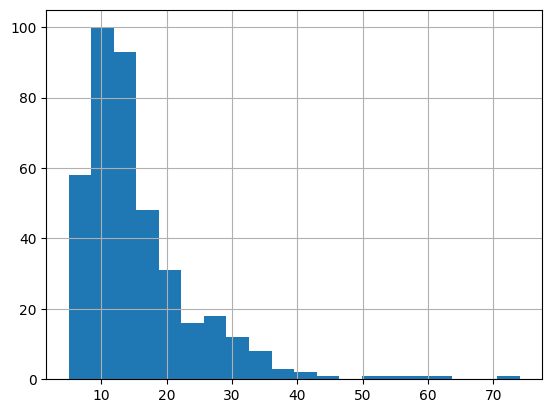

In [ ]:
# visaul ref count
analysis_df[analysis_df["is_full_conference"]]['ref_count'].hist(bins=20)

<Axes: >

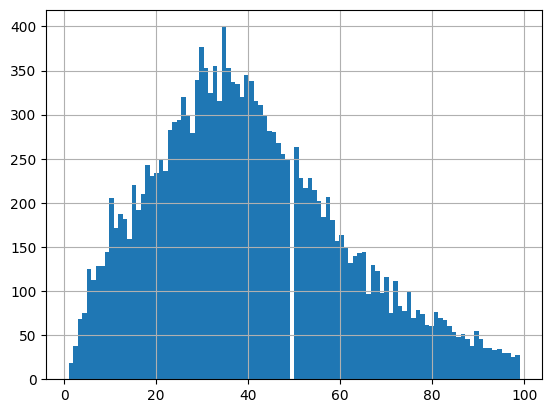

In [ ]:
analysis_df[(~analysis_df["is_full_conference"]) & (analysis_df['ref_count'] < 100)]['ref_count'].hist(bins=100)

In [ ]:
selected_columns = [
    "title",
    "abstract",
    "is_full_conference",
    "subject_name",
    "subject_area",
    "ref_count",
    # "author_details",
    # "author_affiliation",
]
selected_df = analysis_df[selected_columns]

#### V2 (use source_type = "Conference Proceeding" and document_type = "Conference Paper" and drop unclear about Conference Paper)

In [ ]:
selected_df = df.copy()
# drop all follwoing df[(df['document_type'] == 'Conference Paper') & (df['source_type'] != 'Conference Proceeding')]
print(f"total dropped: {len(df[(df['document_type'] == 'Conference Paper') & (df['source_type'] != 'Conference Proceeding')])}")
selected_df = selected_df[~((selected_df['document_type'] == 'Conference Paper') & (selected_df['source_type'] != 'Conference Proceeding'))]

def label_paper(row):
    if row['document_type'] == 'Conference Paper' and row['source_type'] == 'Conference Proceeding':
        return True
    else:
        return False

selected_df['is_full_conference'] = selected_df.apply(label_paper, axis=1)
selected_df['is_full_conference'].value_counts()

total dropped: 319


is_full_conference
False    17466
True      1222
Name: count, dtype: int64

In [ ]:
selected_columns = [
    "title",
    "abstract",
    "is_full_conference",
    "subject_name",
    "subject_area",
    "ref_count",
    "author_details",
    "author_affiliation",
]
selected_df = selected_df[selected_columns]
selected_df

,title,abstract,is_full_conference,subject_name,subject_area,ref_count,author_details,author_affiliation
0,Lactide Lactone Chain Shuttling Copolymerizati...,The chain shuttling ring-opening copolymerizat...,False,Colloid and Surface Chemistry,"[Colloid and Surface Chemistry,true,CENG,1505]",26.0,"[true,14628092300,9,{""@id"":""60104665"",""@href"":...","{""@id"":""60104665"",""@href"":""https://api.elsevie..."
1,Developing guidelines for thermal comfort and ...,"In Thailand, many government buildings and fac...",False,"Management, Monitoring, Policy and Law","[Management, Monitoring, Policy and Law,true,E...",54.0,"[true,6506576698,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
2,Characteristics and outcomes of lung cancers d...,Background: Lung cancer screening (LCS) with l...,False,Medicine (all),"[Medicine (all),true,MEDI,2700]",48.0,"[true,8512823700,10,{""@id"":""60029929"",""@href"":...","{""@id"":""60029929"",""@href"":""https://api.elsevie..."
3,Search for light pseudoscalar boson pairs prod...,A search is presented for pairs of light pseud...,False,Nuclear and High Energy Physics,"[Nuclear and High Energy Physics,true,PHYS,3106]",68.0,"[true,56181581800,2285,{""@id"":""60032179"",""@hre...","{""@id"":""60032179"",""@href"":""https://api.elsevie..."
4,Thermosetting Shape Memory Polymers and Compos...,"When dealing with smart polymers, in particula...",False,Organic Chemistry,"[Organic Chemistry,true,CHEM,1605]",53.0,"[true,6504175603,5,{""@id"":""60010500"",""@href"":""...","{""@id"":""60010500"",""@href"":""https://api.elsevie..."
...,...,...,...,...,...,...,...,...
19002,Electrochemical detection of c-reactive protei...,"In this present work, a novel electrochemical ...",False,Analytical Chemistry,"[Analytical Chemistry,true,CHEM,1602]",27.0,"[true,6602082849,5,[{""@id"":""60028190"",""@href"":...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
19003,Molecular dynamics provides insight into how N...,"Produced by levansucrase, levan and levan olig...",False,Multidisciplinary,"[Multidisciplinary,true,MULT,1000]",65.0,"[true,24729415100,3,[{""@id"":""60028190"",""@href""...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
19004,Rhinacanthin-C enhances chemosensitivity of br...,Introduction: High expression of P-glycoprotei...,False,Drug Discovery,"[Drug Discovery,true,PHAR,3002]",30.0,"[true,6506508925,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
19005,"Hydrogen adsorption on zigzag (4,0), (5,0) and...",The adsorption of selected elements from perio...,False,Electrical and Electronic Engineering,"[Electrical and Electronic Engineering,true,EN...",68.0,"[true,6602583399,3,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."


#### Merge

In [ ]:
import json
import ast
import re

In [ ]:
def convert_to_array(text):
    """
    Converts a string representation of an array to a Python list.
    Handles cases with unquoted strings and special characters.

    Args:
        text (str): The input string to convert

    Returns:
        list: The parsed array
    """
    if not isinstance(text, str):
        return []

    # try:
    # Clean the string to make it valid Python syntax
    # 1. Quote unquoted strings (words containing letters, dots, or spaces)
    text = text.strip('"\'')
    
    # 1. Handle boolean values first
    cleaned = text.replace('true', 'True').replace('false', 'False')
    
    # 2. Handle null values
    cleaned = cleaned.replace('null', 'None')
    
    # 3. Handle dictionary entries with @ symbols
    # Look for patterns like {@id:... , @href:...} and properly quote them
    def fix_dict(match):
        dict_str = match.group(0)
        # Replace @key with "@key"
        dict_str = re.sub(r'@(\w+)', r'"@\1"', dict_str)
        return dict_str
        
    cleaned = re.sub(r'{[^}]+}', fix_dict, cleaned)
    
    # 4. Quote unquoted URLs
    cleaned = re.sub(r'(?<=[,\[{])\s*(https?://[^\s,\]}]+)(?=\s*[,\]}])', r'"\1"', cleaned)
    
    # 5. Quote unquoted words (but not numbers)
    cleaned = re.sub(r'(?<=[,\[{])\s*([a-zA-Z][a-zA-Z\s\._]+)(?=\s*[,\]}])', r'"\1"', cleaned)
    
    # 6. Fix any double quotes that might have been added
    cleaned = cleaned.replace('""', '"')
    
    # Try to evaluate
    return ast.literal_eval(cleaned)
    # except (ValueError, SyntaxError) as e:
    #     print(f"Error parsing string: {e}")
    #     return []


In [ ]:
print(selected_df.iloc[0]['author_details'])

[true,14628092300,9,{"@id":"60104665","@href":"https://api.elsevier.com/content/affiliation/affiliation_id/60104665"},https://api.elsevier.com/content/author/author_id/14628092300,null,Philippe,Zinck P.,P.,null,Zinck,[Philippe,Zinck P.,P.,Zinck]]


In [ ]:
example_authors = selected_df.iloc[0]['author_details']
# example_authors= selected_df['author_details'][3889]
arr = convert_to_array(example_authors)
arr

['True',
 14628092300,
 9,
 {'@id': '60104665',
  '@href': 'https://api.elsevier.com/content/affiliation/affiliation_id/60104665'},
 'https://api.elsevier.com/content/author/author_id/14628092300',
 'None',
 'Philippe',
 'Zinck P.',
 'P.',
 'None',
 'Zinck',
 ['Philippe', 'Zinck P.', 'P.', 'Zinck']]

In [ ]:
# check datatype of author_details and author_affiliation
print(selected_df['author_details'].dtype)
print(selected_df['author_affiliation'].dtype)

object
object


In [ ]:
# parse first from str to array in subject area [Organic Chemistry,true,CHEM,1605]
selected_df["subject_area"] = selected_df["subject_area"].apply(
    lambda x: x.split(",")[0][1:] if x else None
)


def author_detail_extractor(df):
    num_authors = []
    
    for i, row in df.iterrows():
        # parse to array
        authors = row['author_details']
        if authors:
            try:
                authors = ast.literal_eval(authors)
            except:
                authors = []
        num_authors.append(len(authors))
    
    return num_authors


# author_df = pd.DataFrame(author_detail_extractor(selected_df), columns=['num_authors'])
# selected_df = pd.concat([selected_df, author_df], axis=1)
selected_df.reset_index(drop=True, inplace=True)
selected_df

,title,abstract,is_full_conference,subject_name,subject_area,ref_count,author_details,author_affiliation
0,Lactide Lactone Chain Shuttling Copolymerizati...,The chain shuttling ring-opening copolymerizat...,False,Colloid and Surface Chemistry,lloid and Surface Chemistry,26.0,"[true,14628092300,9,{""@id"":""60104665"",""@href"":...","{""@id"":""60104665"",""@href"":""https://api.elsevie..."
1,Developing guidelines for thermal comfort and ...,"In Thailand, many government buildings and fac...",False,"Management, Monitoring, Policy and Law",nagement,54.0,"[true,6506576698,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
2,Characteristics and outcomes of lung cancers d...,Background: Lung cancer screening (LCS) with l...,False,Medicine (all),dicine (all),48.0,"[true,8512823700,10,{""@id"":""60029929"",""@href"":...","{""@id"":""60029929"",""@href"":""https://api.elsevie..."
3,Search for light pseudoscalar boson pairs prod...,A search is presented for pairs of light pseud...,False,Nuclear and High Energy Physics,clear and High Energy Physics,68.0,"[true,56181581800,2285,{""@id"":""60032179"",""@hre...","{""@id"":""60032179"",""@href"":""https://api.elsevie..."
4,Thermosetting Shape Memory Polymers and Compos...,"When dealing with smart polymers, in particula...",False,Organic Chemistry,ganic Chemistry,53.0,"[true,6504175603,5,{""@id"":""60010500"",""@href"":""...","{""@id"":""60010500"",""@href"":""https://api.elsevie..."
...,...,...,...,...,...,...,...,...
18683,Electrochemical detection of c-reactive protei...,"In this present work, a novel electrochemical ...",False,Analytical Chemistry,alytical Chemistry,27.0,"[true,6602082849,5,[{""@id"":""60028190"",""@href"":...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
18684,Molecular dynamics provides insight into how N...,"Produced by levansucrase, levan and levan olig...",False,Multidisciplinary,ltidisciplinary,65.0,"[true,24729415100,3,[{""@id"":""60028190"",""@href""...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
18685,Rhinacanthin-C enhances chemosensitivity of br...,Introduction: High expression of P-glycoprotei...,False,Drug Discovery,ug Discovery,30.0,"[true,6506508925,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
18686,"Hydrogen adsorption on zigzag (4,0), (5,0) and...",The adsorption of selected elements from perio...,False,Electrical and Electronic Engineering,ectrical and Electronic Engineering,68.0,"[true,6602583399,3,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."


In [ ]:
selected_df.to_parquet(f'{PREFIX_DATA_PATH}/12_04_24_selected_all.parquet', index=False)

## Data

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from tqdm.auto import tqdm
from transformers import AutoModel, AutoTokenizer

import os

In [ ]:
PREFIX_DATA_PATH = "../data"
LOGGING_PATH = "../logs"
DEPLOY_MODEL_PATH = "../deploy/model"

os.makedirs(LOGGING_PATH, exist_ok=True)
os.makedirs(PREFIX_DATA_PATH, exist_ok=True)
os.makedirs(DEPLOY_MODEL_PATH, exist_ok=True)

In [ ]:
# df = pd.read_parquet(f'{PREFIX_DATA_PATH}/12_03_24_selected.parquet')
# df = pd.read_parquet(f'{PREFIX_DATA_PATH}/12_03_24_selected_all.parquet')
# df = pd.read_parquet(f'{PREFIX_DATA_PATH}/12_04_24_selected.parquet')
df = pd.read_parquet(f'{PREFIX_DATA_PATH}/12_04_24_selected_all.parquet')
# df['ref_count'] = df['ref_count'].astype(int)
df.dropna(subset=['ref_count'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,title,abstract,is_full_conference,subject_name,subject_area,ref_count,author_details,author_affiliation
0,Lactide Lactone Chain Shuttling Copolymerizati...,The chain shuttling ring-opening copolymerizat...,False,Colloid and Surface Chemistry,lloid and Surface Chemistry,26.0,"[true,14628092300,9,{""@id"":""60104665"",""@href"":...","{""@id"":""60104665"",""@href"":""https://api.elsevie..."
1,Developing guidelines for thermal comfort and ...,"In Thailand, many government buildings and fac...",False,"Management, Monitoring, Policy and Law",nagement,54.0,"[true,6506576698,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
2,Characteristics and outcomes of lung cancers d...,Background: Lung cancer screening (LCS) with l...,False,Medicine (all),dicine (all),48.0,"[true,8512823700,10,{""@id"":""60029929"",""@href"":...","{""@id"":""60029929"",""@href"":""https://api.elsevie..."
3,Search for light pseudoscalar boson pairs prod...,A search is presented for pairs of light pseud...,False,Nuclear and High Energy Physics,clear and High Energy Physics,68.0,"[true,56181581800,2285,{""@id"":""60032179"",""@hre...","{""@id"":""60032179"",""@href"":""https://api.elsevie..."
4,Thermosetting Shape Memory Polymers and Compos...,"When dealing with smart polymers, in particula...",False,Organic Chemistry,ganic Chemistry,53.0,"[true,6504175603,5,{""@id"":""60010500"",""@href"":""...","{""@id"":""60010500"",""@href"":""https://api.elsevie..."
...,...,...,...,...,...,...,...,...
18324,Electrochemical detection of c-reactive protei...,"In this present work, a novel electrochemical ...",False,Analytical Chemistry,alytical Chemistry,27.0,"[true,6602082849,5,[{""@id"":""60028190"",""@href"":...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
18325,Molecular dynamics provides insight into how N...,"Produced by levansucrase, levan and levan olig...",False,Multidisciplinary,ltidisciplinary,65.0,"[true,24729415100,3,[{""@id"":""60028190"",""@href""...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
18326,Rhinacanthin-C enhances chemosensitivity of br...,Introduction: High expression of P-glycoprotei...,False,Drug Discovery,ug Discovery,30.0,"[true,6506508925,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
18327,"Hydrogen adsorption on zigzag (4,0), (5,0) and...",The adsorption of selected elements from perio...,False,Electrical and Electronic Engineering,ectrical and Electronic Engineering,68.0,"[true,6602583399,3,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."


### Data Preprocessing

#### Bert

In [ ]:
model_name = "allenai/scibert_scivocab_uncased"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModel.from_pretrained(model_name, device_map=device, torch_dtype=torch.float16)

model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31090, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
def get_bert_embeddings(df, batch_size=256, max_length=512):
    global tokenizer, model
    title_embeddings = []
    abstract_embeddings = []

    # Process texts in batches
    for i in tqdm(range(0, len(df), batch_size)):
        batch_df = df[i : i + batch_size]

        # combined_texts = [f"{title} [SEP] {abstract}" for title, abstract in zip(batch_df['title'], batch_df['abstract'])]
        title_texts = [title if isinstance(title, str) else "" for title in batch_df['title'].tolist()]
        abstract_texts = [abstract if isinstance(abstract, str) else "" for abstract in batch_df['abstract'].tolist()]
    

        def process_batch(batch_texts):
            inputs = tokenizer(
                batch_texts,
                return_tensors="pt",
                padding=True,
                truncation=True,
                max_length=max_length,
            )

            inputs = {key: val.to(model.device) for key, val in inputs.items()}

            with torch.no_grad():
                outputs = model(**inputs)

            last_hidden_state = outputs.last_hidden_state.detach().cpu().numpy()
            # A : (batch_size, sequence_length, hidden_size)
            return last_hidden_state.mean(axis=1)

        title_embeddings.append(process_batch(title_texts))
        abstract_embeddings.append(process_batch(abstract_texts))

    title_embeddings = np.vstack(title_embeddings)
    abstract_embeddings = np.vstack(abstract_embeddings)

    return np.hstack([title_embeddings, abstract_embeddings])

In [ ]:
X = get_bert_embeddings(df)
X.shape

  0%|          | 0/72 [00:00<?, ?it/s]

(18329, 1536)

In [ ]:
np.save(f'{PREFIX_DATA_PATH}/12_04_24_embeddings_bert_full.npy', X)

#### jina-embeddings-v3

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained("jinaai/jina-embeddings-v3", trust_remote_code=True, device_map=device)
tasks = ["text-matching", "retrieval.passage", "classification", "retrieval.query", "separation"]

In [ ]:
def get_embeddings(df, task=tasks[0], max_length=8192):
    print(f"Using task: {task}")
    # combined_texts = [f"{title} {abstract}" for title, abstract in zip(df['title'], df['abstract'])]
    titles = [title if isinstance(title, str) else "" for title in df['title'].tolist()]
    abstracts = [abstract if isinstance(abstract, str) else "" for abstract in df['abstract'].tolist()]
    
    # Process in batches to handle memory efficiently
    batch_size = 64
    all_title_embeddings = []
    all_abstract_embeddings = []
    
    
    for i in tqdm(range(0, len(titles), batch_size)):
        batch_titles = titles[i:i + batch_size]
        # Use the model's encode method which handles tokenization internally
        batch_embeddings = model.encode(
            batch_titles,
            task=task,
            max_length=max_length
        )
        all_title_embeddings.append(batch_embeddings)
        
        batch_abstracts = abstracts[i:i + batch_size]
        batch_embeddings = model.encode(
            batch_abstracts,
            task=task,
            max_length=max_length
        )
        all_abstract_embeddings.append(batch_embeddings)
    title_embeddings = np.vstack(all_title_embeddings)
    abstract_embeddings = np.vstack(all_abstract_embeddings)
    
    # extend abstract embeddings with title embeddings
    return np.hstack([title_embeddings, abstract_embeddings])

In [ ]:
# Generate embeddings
X = get_embeddings(df)
print(f"Embedding shape: {X.shape}")

In [ ]:
np.save(f'{PREFIX_DATA_PATH}/12_03_24_embeddings_jina_sep.npy', X)

### Merge

In [ ]:
# X = np.load(f'{PREFIX_DATA_PATH}/12_02_24_embeddings_X.npy')
# X = np.load(f'{PREFIX_DATA_PATH}/12_02_24_embeddings_jina.npy')
# X = np.load(f'{PREFIX_DATA_PATH}/12_03_24_embeddings_jina_sep.npy')
X = np.load(f'{PREFIX_DATA_PATH}/12_04_24_embeddings_bert_full.npy')
X.shape

(18329, 1536)

In [ ]:
df

,title,abstract,is_full_conference,subject_name,subject_area,ref_count,author_details,author_affiliation
0,Lactide Lactone Chain Shuttling Copolymerizati...,The chain shuttling ring-opening copolymerizat...,False,Colloid and Surface Chemistry,lloid and Surface Chemistry,26.0,"[true,14628092300,9,{""@id"":""60104665"",""@href"":...","{""@id"":""60104665"",""@href"":""https://api.elsevie..."
1,Developing guidelines for thermal comfort and ...,"In Thailand, many government buildings and fac...",False,"Management, Monitoring, Policy and Law",nagement,54.0,"[true,6506576698,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
2,Characteristics and outcomes of lung cancers d...,Background: Lung cancer screening (LCS) with l...,False,Medicine (all),dicine (all),48.0,"[true,8512823700,10,{""@id"":""60029929"",""@href"":...","{""@id"":""60029929"",""@href"":""https://api.elsevie..."
3,Search for light pseudoscalar boson pairs prod...,A search is presented for pairs of light pseud...,False,Nuclear and High Energy Physics,clear and High Energy Physics,68.0,"[true,56181581800,2285,{""@id"":""60032179"",""@hre...","{""@id"":""60032179"",""@href"":""https://api.elsevie..."
4,Thermosetting Shape Memory Polymers and Compos...,"When dealing with smart polymers, in particula...",False,Organic Chemistry,ganic Chemistry,53.0,"[true,6504175603,5,{""@id"":""60010500"",""@href"":""...","{""@id"":""60010500"",""@href"":""https://api.elsevie..."
...,...,...,...,...,...,...,...,...
18324,Electrochemical detection of c-reactive protei...,"In this present work, a novel electrochemical ...",False,Analytical Chemistry,alytical Chemistry,27.0,"[true,6602082849,5,[{""@id"":""60028190"",""@href"":...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
18325,Molecular dynamics provides insight into how N...,"Produced by levansucrase, levan and levan olig...",False,Multidisciplinary,ltidisciplinary,65.0,"[true,24729415100,3,[{""@id"":""60028190"",""@href""...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
18326,Rhinacanthin-C enhances chemosensitivity of br...,Introduction: High expression of P-glycoprotei...,False,Drug Discovery,ug Discovery,30.0,"[true,6506508925,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
18327,"Hydrogen adsorption on zigzag (4,0), (5,0) and...",The adsorption of selected elements from perio...,False,Electrical and Electronic Engineering,ectrical and Electronic Engineering,68.0,"[true,6602583399,3,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."


In [ ]:
df['subject_name'].nunique(), df['subject_area'].nunique()

(299, 287)

In [ ]:
additional_features = np.column_stack([
    # pd.get_dummies(df['subject_name']),
    df['ref_count'],
    df['abstract'].str.len(),
    df['title'].str.len()
])

X_combined = np.hstack([X, additional_features])
X_combined.shape

(18329, 1539)

In [ ]:
df

,title,abstract,is_full_conference,subject_name,subject_area,ref_count,author_details,author_affiliation
0,Lactide Lactone Chain Shuttling Copolymerizati...,The chain shuttling ring-opening copolymerizat...,False,Colloid and Surface Chemistry,lloid and Surface Chemistry,26.0,"[true,14628092300,9,{""@id"":""60104665"",""@href"":...","{""@id"":""60104665"",""@href"":""https://api.elsevie..."
1,Developing guidelines for thermal comfort and ...,"In Thailand, many government buildings and fac...",False,"Management, Monitoring, Policy and Law",nagement,54.0,"[true,6506576698,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
2,Characteristics and outcomes of lung cancers d...,Background: Lung cancer screening (LCS) with l...,False,Medicine (all),dicine (all),48.0,"[true,8512823700,10,{""@id"":""60029929"",""@href"":...","{""@id"":""60029929"",""@href"":""https://api.elsevie..."
3,Search for light pseudoscalar boson pairs prod...,A search is presented for pairs of light pseud...,False,Nuclear and High Energy Physics,clear and High Energy Physics,68.0,"[true,56181581800,2285,{""@id"":""60032179"",""@hre...","{""@id"":""60032179"",""@href"":""https://api.elsevie..."
4,Thermosetting Shape Memory Polymers and Compos...,"When dealing with smart polymers, in particula...",False,Organic Chemistry,ganic Chemistry,53.0,"[true,6504175603,5,{""@id"":""60010500"",""@href"":""...","{""@id"":""60010500"",""@href"":""https://api.elsevie..."
...,...,...,...,...,...,...,...,...
18324,Electrochemical detection of c-reactive protei...,"In this present work, a novel electrochemical ...",False,Analytical Chemistry,alytical Chemistry,27.0,"[true,6602082849,5,[{""@id"":""60028190"",""@href"":...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
18325,Molecular dynamics provides insight into how N...,"Produced by levansucrase, levan and levan olig...",False,Multidisciplinary,ltidisciplinary,65.0,"[true,24729415100,3,[{""@id"":""60028190"",""@href""...","[{""@id"":""60028190"",""@href"":""https://api.elsevi..."
18326,Rhinacanthin-C enhances chemosensitivity of br...,Introduction: High expression of P-glycoprotei...,False,Drug Discovery,ug Discovery,30.0,"[true,6506508925,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
18327,"Hydrogen adsorption on zigzag (4,0), (5,0) and...",The adsorption of selected elements from perio...,False,Electrical and Electronic Engineering,ectrical and Electronic Engineering,68.0,"[true,6602583399,3,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."


In [ ]:
embedding_features = [f'title_{i}' for i in range(X.shape[1] // 2)]
embedding_features += [f'abstract_{i}' for i in range(X.shape[1] // 2)]

# Get subject dummy column names
subject_dummies = pd.get_dummies(df['subject_name']).columns.tolist()

# Additional feature names
additional_features = [
    # *subject_dummies,  # Unpack subject dummy names
    'ref_count',
    'abstract_length',
    'title_length'
]

# Combine all feature names
all_feature_names = embedding_features + additional_features

# Convert X_combined to DataFrame with feature names
X_combined_df = pd.DataFrame(X_combined, columns=all_feature_names)
X_combined_df

,title_0,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,title_9,...,abstract_761,abstract_762,abstract_763,abstract_764,abstract_765,abstract_766,abstract_767,ref_count,abstract_length,title_length
0,0.943848,-0.833984,-0.856445,-0.593750,-0.146851,-0.059021,0.053680,0.541504,-0.232666,0.938965,...,-0.147827,0.003408,-0.079590,-0.261963,-0.361328,0.396973,-0.343750,26.0,673.0,173.0
1,-1.022461,-1.060547,0.034241,-0.071899,0.599609,0.398193,-0.189575,-0.125244,0.323486,0.220825,...,-0.391846,-0.273193,-0.190918,-0.214111,-0.205322,-0.146973,-0.658203,54.0,1402.0,120.0
2,-0.755371,-0.668457,-0.381104,-0.563477,-0.214722,-0.004639,0.116516,-0.204102,-0.260742,-0.316162,...,0.159912,-0.228394,-0.187256,-0.168457,-0.139648,-0.167847,-0.758789,48.0,1759.0,90.0
3,0.149536,0.288330,-0.288086,0.338135,0.075134,0.542480,1.339844,0.793457,-0.421143,0.173706,...,0.067322,-0.032776,-0.575195,-0.323730,-0.422119,0.151245,-0.890137,68.0,1125.0,170.0
4,0.015350,-0.863770,-0.250732,0.344727,0.166138,-0.275879,0.738281,0.341309,0.077148,0.833984,...,-0.034851,0.009270,-0.124878,-0.458740,-0.390381,0.293945,-0.301025,53.0,631.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18324,0.338379,-0.403320,-0.149902,-0.213623,0.177612,0.846680,-0.499268,0.422852,-0.336914,1.171875,...,-0.463867,-0.498291,0.010345,-0.212036,-0.172974,-0.030289,-0.688477,27.0,1379.0,129.0
18325,0.409668,-0.058716,0.131226,0.402832,0.306641,-0.268799,0.078308,0.334229,0.171509,0.151855,...,-0.239624,-0.459473,0.153687,-0.391357,-0.195679,0.228882,-0.592773,65.0,2144.0,173.0
18326,-0.149048,-0.581543,-0.406982,0.249634,0.392334,0.608887,-0.469482,0.223022,-0.208740,0.062927,...,-0.255127,-0.466553,-0.082825,-0.398193,-0.354248,-0.120117,-0.394043,30.0,1647.0,159.0
18327,0.147217,-0.066223,-0.264404,0.620605,0.086121,0.108704,0.190796,0.330566,-0.074585,0.004726,...,-0.487793,-0.476562,-0.045258,-0.242432,-0.412598,-0.048462,-1.183594,68.0,834.0,145.0


In [ ]:
# author_features = np.column_stack([
#     df['authors'].str.count(';') + 1,  # Number of authors
#     df.groupby('affiliation')['affiliation'].transform('count'),  # Papers per affiliation
#     df['authors'].apply(lambda x: len(set(x.split(';'))))  # Unique authors
# ])
# # X_combined = np.hstack([X_combined, author_features])
# author_features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, 
    df['is_full_conference'],
    test_size=0.2,
    random_state=42,
    stratify=df['is_full_conference']
)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# First, calculate class weights explicitly
unique_classes = np.unique(df["is_full_conference"])
class_weights = compute_class_weight(
    class_weight="balanced", classes=unique_classes, y=df["is_full_conference"]
)

# Convert class weights to sample weights
sample_weights = np.ones(len(y_train))
for idx, label in enumerate(np.unique(y_train)):
    sample_weights[y_train == label] = class_weights[idx]

sample_weights, class_weights

(array([0.53568506, 0.53568506, 0.53568506, ..., 0.53568506, 7.50573301,
        0.53568506]),
 array([0.53568506, 7.50573301]))

#### Scale

In [ ]:
from sklearn.preprocessing import StandardScaler

embedding_scaler = StandardScaler()
other_features_scaler = StandardScaler()

embedding_features = X.shape[1]
embeddings = X_combined[:, :embedding_features]
other_features = X_combined[:, embedding_features:]

# Scale separately
scaled_embeddings = embedding_scaler.fit_transform(embeddings)
scaled_other = other_features_scaler.fit_transform(other_features)

# Recombine
X_scaled = np.hstack([scaled_embeddings, scaled_other])

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    df["is_full_conference"],
    test_size=0.2,
    random_state=42,
    stratify=df["is_full_conference"],
)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Start with 100 trees
    max_depth=None,        # Let trees grow fully
    min_samples_split=5,   # Require more samples to split to prevent overfitting
    min_samples_leaf=2,    # Minimum samples in leaf nodes
    max_features='sqrt',   # Traditional RF uses sqrt(n_features)
    class_weight='balanced', # Handle potential class imbalance
    n_jobs=-1,            # Use all available cores
    random_state=42
)



cv_scores = cross_val_score(
    rf_classifier,
    X_train,
    y_train,
    cv=5,
    scoring='f1'  # Or 'balanced_accuracy' if classes are imbalanced
)

print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Train the final model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

Cross-validation scores: [0.18918919 0.03076923 0.11428571 0.08219178 0.08823529]
Average CV score: 0.101 (+/- 0.104)


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = rf_classifier.feature_importances_
top_features_idx = np.argsort(feature_importance)[-10:]

print("\nTop 10 Most Important Features:")
for idx in top_features_idx:
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")


Classification Report:
              precision    recall  f1-score   support

       False       0.76      0.99      0.86       230
        True       0.70      0.09      0.16        79

    accuracy                           0.76       309
   macro avg       0.73      0.54      0.51       309
weighted avg       0.74      0.76      0.68       309


Top 10 Most Important Features:
Feature 276: 0.0042
Feature 1347: 0.0044
Feature 999: 0.0047
Feature 241: 0.0047
Feature 519: 0.0051
Feature 697: 0.0052
Feature 1009: 0.0075
Feature 1550: 0.0081
Feature 912: 0.0083
Feature 783: 0.0086


### catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
catboost_classifier = CatBoostClassifier(
    iterations=500,           # Number of trees
    learning_rate=0.05,        
    depth=6,                   # Max depth of trees
    min_data_in_leaf=10,
    l2_leaf_reg=5,
    loss_function='Logloss',   # Binary classification loss
    eval_metric='F1',          # Track F1 score during training
    random_seed=42,
    task_type='CPU',          # Change to 'GPU' if you have GPU available
    verbose=100,              # Print progress every 100 iterations
    early_stopping_rounds=100, # Stop training if no improvement after 50 rounds
    class_weights=class_weights,
)

eval_dataset = Pool(
    data=X_test,
    label=y_test
)

# Train the model with evaluation set for early stopping
catboost_classifier.fit(
    X_train, 
    y_train,
    eval_set=eval_dataset,
    plot=True
)

y_pred = catboost_classifier.predict(X_test)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = catboost_classifier.get_feature_importance()
top_features_idx = np.argsort(feature_importance)[-10:]

print("\nTop 10 Most Important Features:")
for idx in top_features_idx:
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8843581	test: 0.8660195	best: 0.8660195 (0)	total: 164ms	remaining: 1m 21s
100:	learn: 0.9736855	test: 0.9366689	best: 0.9390064 (96)	total: 5.23s	remaining: 20.7s
200:	learn: 0.9850330	test: 0.9468333	best: 0.9468333 (199)	total: 10.1s	remaining: 15.1s
300:	learn: 0.9907003	test: 0.9437365	best: 0.9521366 (262)	total: 14.9s	remaining: 9.86s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9521365516
bestIteration = 262

Shrink model to first 263 iterations.

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.97      0.98      3422
        True       0.70      0.93      0.80       244

    accuracy                           0.97      3666
   macro avg       0.85      0.95      0.89      3666
weighted avg       0.98      0.97      0.97      3666


Top 10 Most Important Features:
Feature 1009: 1.0663
Feature 783: 1.1380
Feature 1210: 1.1841
Feature 1599: 1.2603
Feature 867: 1.3233
Feature 475: 1.520

In [ ]:
cv_scores = cross_val_score(
    catboost_classifier,
    X_combined,
    df['is_full_conference'],
    cv=5,
    scoring='f1'
)

print("\nCross-validation scores:")
print(f"Mean F1: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

0:	learn: 0.8892392	total: 125ms	remaining: 1m 2s
100:	learn: 0.9710820	total: 5.57s	remaining: 22s
200:	learn: 0.9851038	total: 11s	remaining: 16.3s
300:	learn: 0.9903062	total: 16s	remaining: 10.6s
400:	learn: 0.9929280	total: 20.8s	remaining: 5.14s
499:	learn: 0.9947318	total: 25.5s	remaining: 0us
0:	learn: 0.8888883	total: 141ms	remaining: 1m 10s
100:	learn: 0.9715758	total: 5.63s	remaining: 22.2s
200:	learn: 0.9855294	total: 10.9s	remaining: 16.1s
300:	learn: 0.9913101	total: 16s	remaining: 10.6s
400:	learn: 0.9937208	total: 20.7s	remaining: 5.12s
499:	learn: 0.9952380	total: 25.5s	remaining: 0us
0:	learn: 0.8795855	total: 114ms	remaining: 57.1s
100:	learn: 0.9730568	total: 5.22s	remaining: 20.6s
200:	learn: 0.9856358	total: 10.1s	remaining: 15s
300:	learn: 0.9911307	total: 15.3s	remaining: 10.1s
400:	learn: 0.9941538	total: 20.3s	remaining: 5s
499:	learn: 0.9962520	total: 25.3s	remaining: 0us
0:	learn: 0.8780468	total: 117ms	remaining: 58.5s
100:	learn: 0.9733443	total: 5.42s	rem

In [ ]:
y_pred = catboost_classifier.predict(X_test)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = catboost_classifier.get_feature_importance()
top_features_idx = np.argsort(feature_importance)[-10:]

print("\nTop 10 Most Important Features:")
for idx in top_features_idx:
    print(f"Feature {idx}: {feature_importance[idx]:.4f}")


Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.97      0.98      3422
        True       0.70      0.93      0.80       244

    accuracy                           0.97      3666
   macro avg       0.85      0.95      0.89      3666
weighted avg       0.98      0.97      0.97      3666


Top 10 Most Important Features:
Feature 1009: 1.0663
Feature 783: 1.1380
Feature 1210: 1.1841
Feature 1599: 1.2603
Feature 867: 1.3233
Feature 475: 1.5205
Feature 1623: 1.8882
Feature 986: 2.1293
Feature 1776: 3.3876
Feature 1835: 26.3375


### XGBoost

In [ ]:
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [ ]:
xgb_classifier = XGBClassifier(
    max_depth=6,
    learning_rate=0.04,
    n_estimators=1000,
    min_child_weight=10,
    tree_method="hist",  # Faster for high-dimensional data
    enable_categorical=True,  # Better handling of categorical features
    early_stopping_rounds=100,
)

xgb_classifier.fit(
    X_train,
    y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test, y_test)],
    verbose=50,
)

y_pred = xgb_classifier.predict(X_test)

[0]	validation_0-logloss:0.66194
[50]	validation_0-logloss:0.17257
[100]	validation_0-logloss:0.10701
[150]	validation_0-logloss:0.08515
[200]	validation_0-logloss:0.07930
[250]	validation_0-logloss:0.07701
[300]	validation_0-logloss:0.07613
[350]	validation_0-logloss:0.07580
[400]	validation_0-logloss:0.07563
[450]	validation_0-logloss:0.07581
[477]	validation_0-logloss:0.07577



Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.98      0.99      3422
        True       0.78      0.86      0.82       244

    accuracy                           0.97      3666
   macro avg       0.89      0.92      0.90      3666
weighted avg       0.98      0.97      0.98      3666



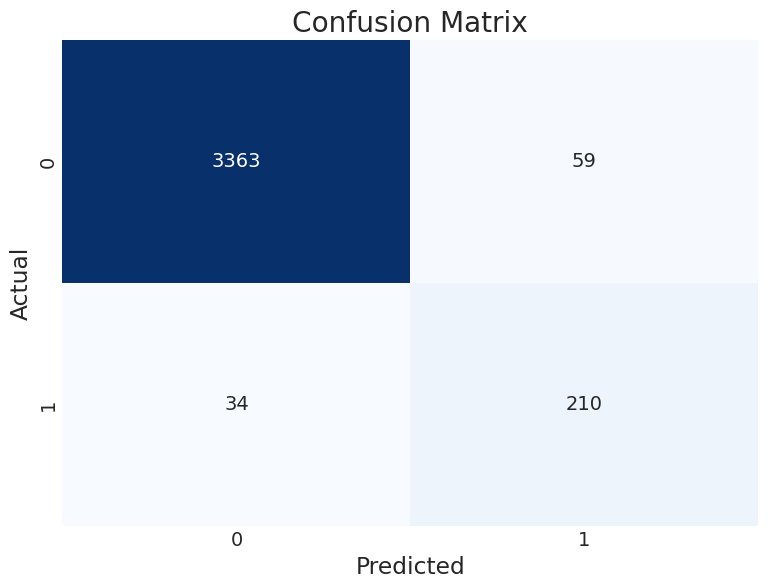

In [ ]:
# Print detailed classification report
print("\nClassification Report:")
report = classification_report(y_test, y_pred)
print(report)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# plot_importance(xgb_classifier, max_num_features=10, )
# plt.show()

/tmp/ipykernel_23203/3988021991.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette=colors)
/tmp/ipykernel_23203/3988021991.py:18: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_features, y=top_features.index, palette=colors)


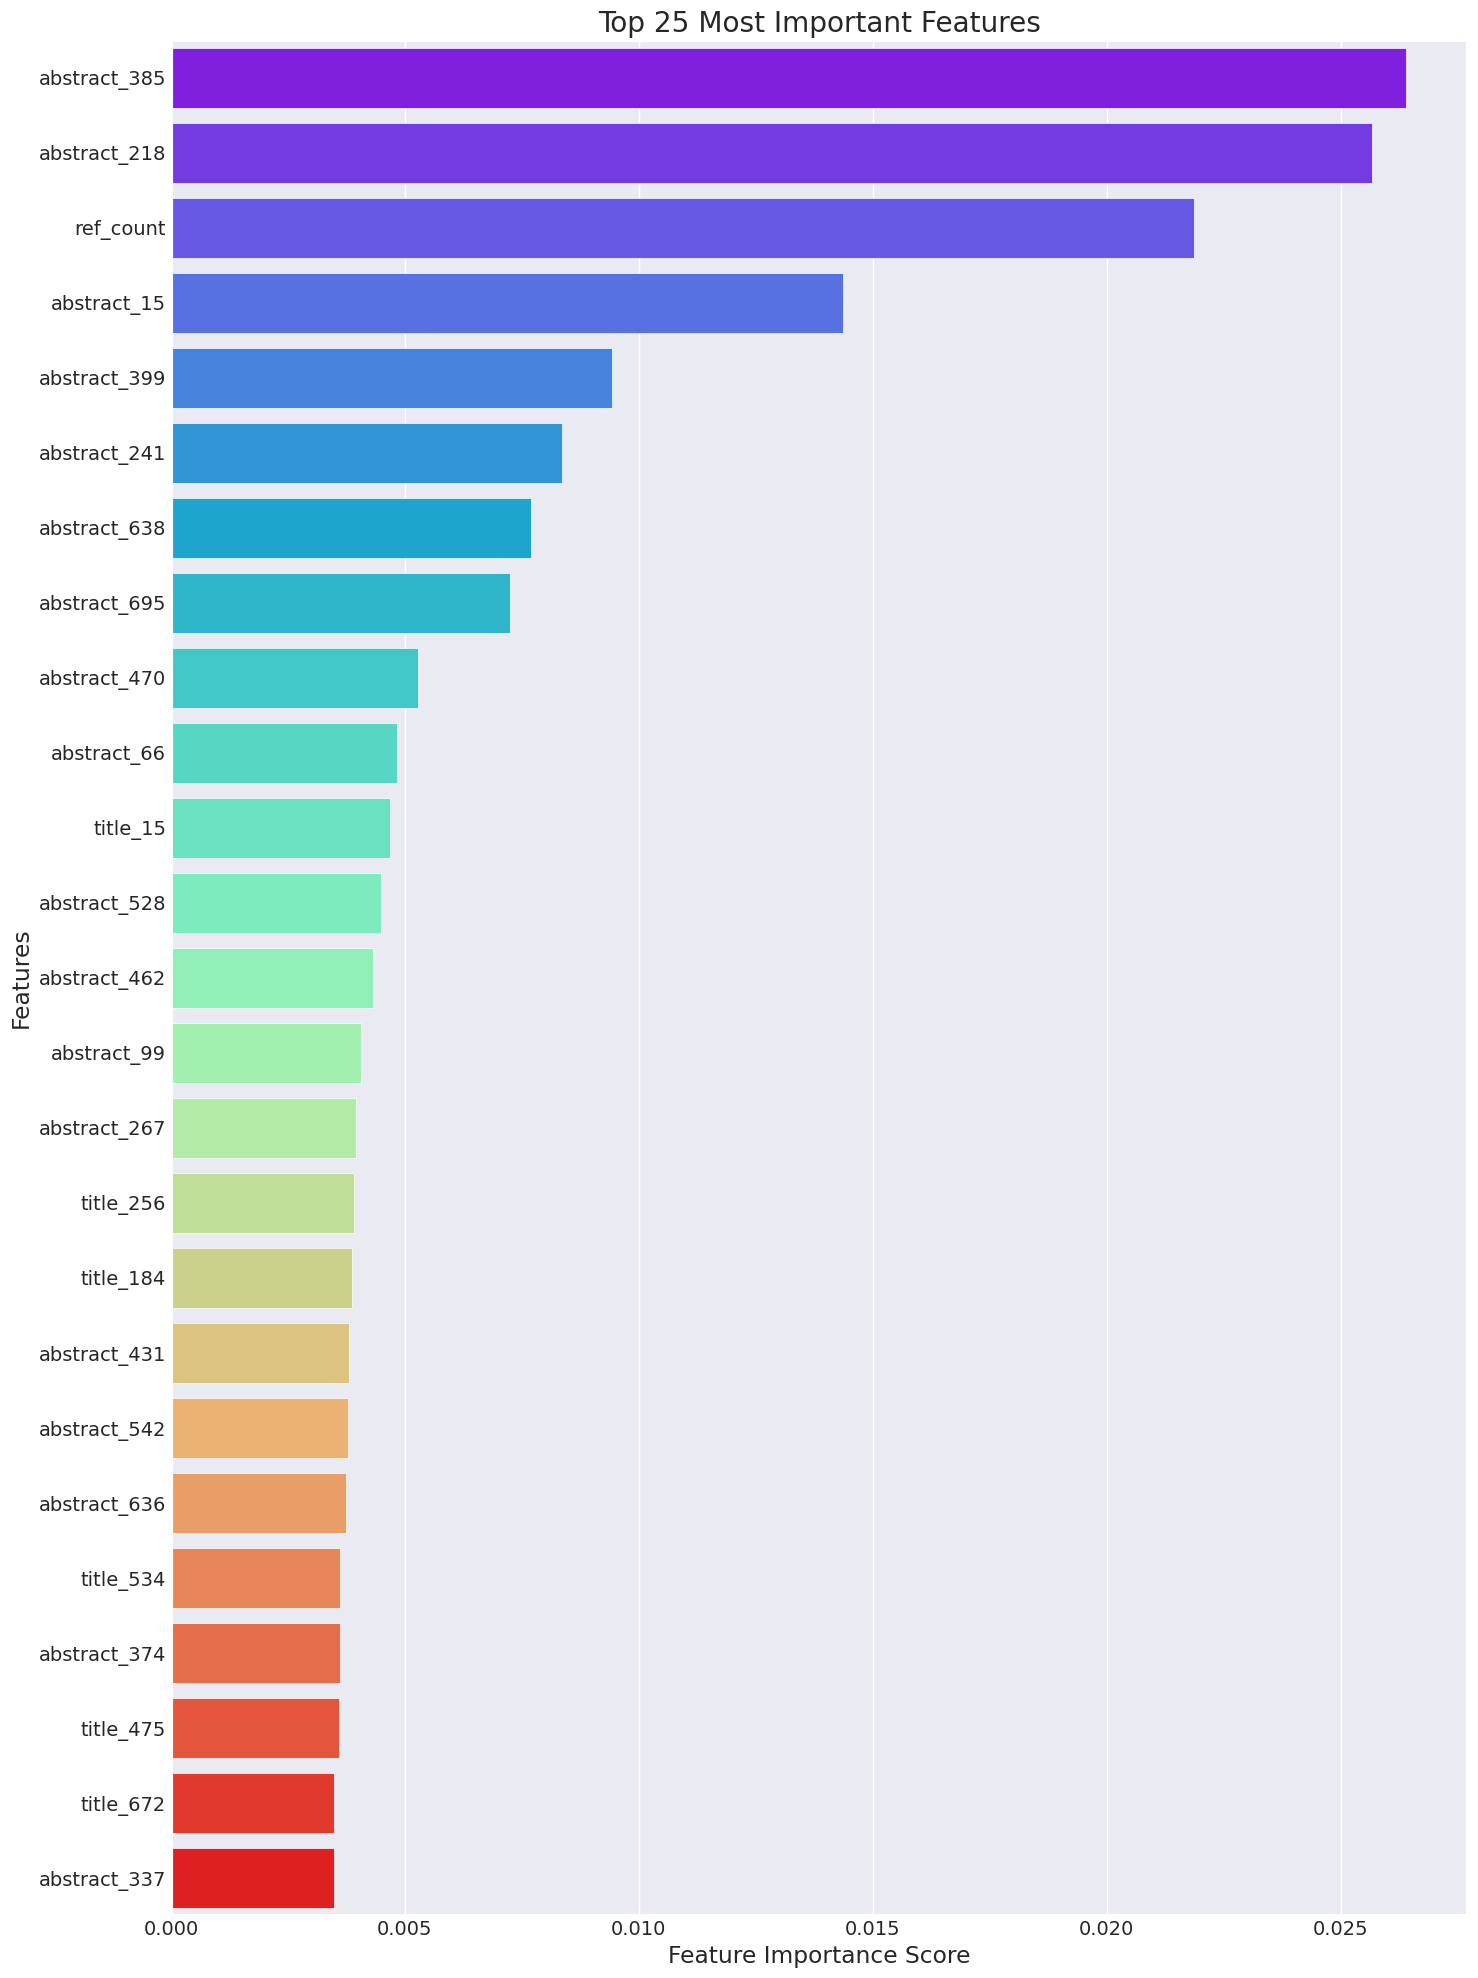

In [ ]:
def plot_feature_importance(
    model,
    X,
    n_top_features=25,
):
    plt.figure(figsize=(15, 20))

    # Get feature importance
    feature_imp = pd.Series(
        model.feature_importances_, index=X.columns
    ).sort_values(ascending=False)

    # Plot top N features
    top_features = feature_imp.head(n_top_features)

    colors = plt.cm.rainbow(np.linspace(0, 1, len(top_features)))
    
    sns.barplot(x=top_features, y=top_features.index, palette=colors)

    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Top {n_top_features} Most Important Features")
    plt.tight_layout()
    plt.show()

    return feature_imp


# Example usage:
feature_importance = plot_feature_importance(xgb_classifier, X_combined_df)

#### Xgboost pipeline for onnx

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
)
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost,
)

import json

In [ ]:
update_registered_converter(
    XGBClassifier,
    "XGBoostXGBClassifier",
    calculate_linear_classifier_output_shapes,
    convert_xgboost,
    options={"nocl": [True, False], "zipmap": [True, False, "columns"]},
)

In [ ]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        (
            "xgb",
            XGBClassifier(
                max_depth=6,
                learning_rate=0.05,
                n_estimators=1000,
                min_child_weight=20,
                tree_method="hist",
                enable_categorical=True,
                early_stopping_rounds=100,
                subsample=0.8,
                colsample_bytree=0.8,
            ),
        ),
    ]
)


In [ ]:
pipeline.fit(
    X_train,
    y_train,
    xgb__sample_weight=sample_weights,
    xgb__eval_set=[(X_test, y_test)],
    xgb__verbose=50,
)

y_pred = pipeline.predict(X_test)
# Print detailed classification reports

[0]	validation_0-logloss:0.65119
[50]	validation_0-logloss:0.24057
[100]	validation_0-logloss:0.33786
[139]	validation_0-logloss:0.39276



Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.95      0.97      3422
        True       0.54      0.88      0.67       244

    accuracy                           0.94      3666
   macro avg       0.77      0.91      0.82      3666
weighted avg       0.96      0.94      0.95      3666



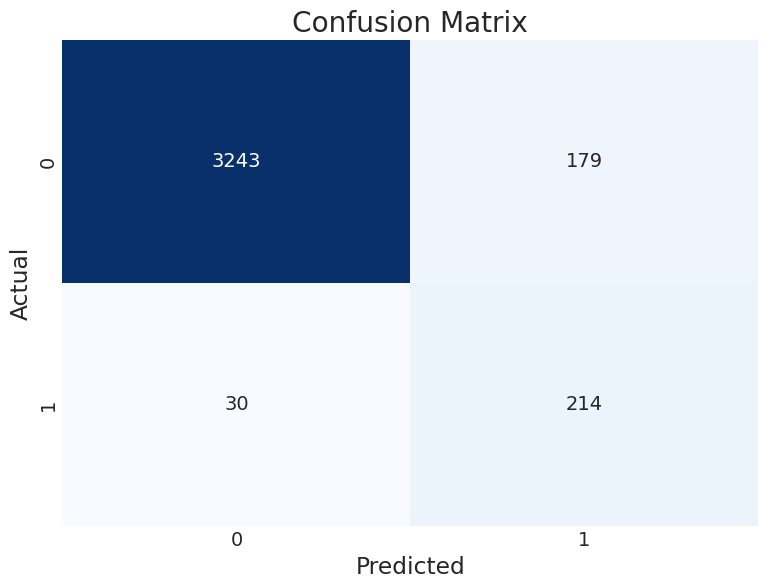

In [ ]:
print("\nClassification Report:")
report = classification_report(y_test, y_pred)
print(report)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# plot_importance(xgb_classifier, max_num_features=10, )
# plt.show()

##### Save train results

In [ ]:
def generate_classification_metrics(y_test, y_pred):
    """Generate and return classification report metrics."""
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    return report_dict

def plot_confusion_matrix(y_test, y_pred, save_path=None):
    """Plot and optionally save confusion matrix."""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
    if save_path:
        plt.savefig(f"{save_path}/confusion_matrix.png", bbox_inches='tight')
        plt.close()
    else:
        plt.show()
    
    return cm.tolist()

def plot_feature_importance(model, feature_names, n_top_features=25, save_path=None):
    """Plot and save feature importance."""
    feature_imp = pd.Series(
        model.feature_importances_, 
        index=feature_names
    ).sort_values(ascending=False)
    
    plt.figure(figsize=(15, 20))
    top_features = feature_imp.head(n_top_features)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(top_features)))
    
    sns.barplot(x=top_features, y=top_features.index, palette=colors)
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Top {n_top_features} Most Important Features")
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}/feature_importance.png", bbox_inches='tight')
        plt.close()
    else:
        plt.show()
    
    return feature_imp.to_dict()

def plot_learning_curves(model, save_path=None):
    """Plot learning curves from model's evals_result."""
    if hasattr(model, 'evals_result'):
        results = model.evals_result()
        plt.figure(figsize=(10, 6))
        for metric in results['validation_0']:
            plt.plot(results['validation_0'][metric], label=f'Test {metric}')
        plt.xlabel('Number of Boosting Rounds')
        plt.ylabel('Error')
        plt.title('Learning Curves')
        plt.legend()
        
        if save_path:
            plt.savefig(f"{save_path}/learning_curves.png", bbox_inches='tight')
            plt.close()
        else:
            plt.show()
            
        return results
    return None

def generate_training_report(model, X_test, y_test, y_pred, save_path="./training_reports"):
    """Generate a complete training report with all metrics and visualizations."""
    # Create directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    # Initialize results dictionary
    results = {}
    
    # Generate classification metrics
    results['classification_report'] = generate_classification_metrics(y_test, y_pred)
    
    # Generate confusion matrix
    results['confusion_matrix'] = plot_confusion_matrix(y_test, y_pred, save_path)
    
    # Generate feature importance plot
    results['feature_importance'] = plot_feature_importance(
        model, 
        X_test.columns, 
        save_path=save_path
    )
    
    # Generate learning curves
    learning_curves = plot_learning_curves(model, save_path)
    if learning_curves:
        results['learning_curves'] = learning_curves
    
    # Save results to JSON
    with open(f"{save_path}/training_report.json", 'w') as f:
        json.dump(results, f, indent=4)
    
    return results

In [ ]:
pipeline_predictions = pipeline.predict(X_test)
X_test_df = pd.DataFrame(X_test, columns=all_feature_names)
y_test_df = pd.DataFrame(y_test, columns=["is_full_conference"])

# Generate training report for the pipeline
results = generate_training_report(
    model=pipeline.steps[1][1],
    X_test=X_test_df,
    y_test=y_test_df,
    y_pred=pipeline_predictions,
    save_path=f"{LOGGING_PATH}/training_reports",
)

/tmp/ipykernel_67517/3312064717.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette=colors)
/tmp/ipykernel_67517/3312064717.py:34: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=top_features, y=top_features.index, palette=colors)


##### Convert to onnx runtime

In [ ]:
initial_type = [("float_input", FloatTensorType([None, X_combined.shape[1]]))]
options = {id(pipeline.named_steps['xgb']): {"zipmap": True}}
onx = convert_sklearn(
    pipeline,
    initial_types=initial_type,
    target_opset={"": 12, "ai.onnx.ml": 2},
    options=options,
)

In [ ]:
with open(f"{DEPLOY_MODEL_PATH}/XGBoost.onnx", "wb") as f:
    f.write(onx.SerializeToString())

##### Load onnx runtime

In [ ]:
import onnxruntime as rt

In [ ]:
rt_inference = rt.InferenceSession(f"{DEPLOY_MODEL_PATH}/XGBoost.onnx", providers=["CPUExecutionProvider"])

In [ ]:
input_name = rt_inference.get_inputs()[0].name
input_name

'float_input'

In [ ]:
df[df['is_full_conference'] == 1]

,title,abstract,is_full_conference,subject_name,subject_area,ref_count,author_details,author_affiliation
36,Effect of Chemical Treatment and Thermal Annea...,Copper foils are widely used as a substrate fo...,True,Physics and Astronomy (all),ysics and Astronomy (all),24.0,"[true,6602333803,7,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
43,0.01 Cent per Second: Developing a Cloud-based...,Using automatic speech recognition (ASR) to tr...,True,Software,ftware,17.0,"[true,12785303000,8,{""@id"":""60028190"",""@href"":...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
88,Blueschists and Blue Amphibole Schists-Gneisse...,The discovery of an areally limited outcrop of...,True,Earth and Planetary Sciences (all),rth and Planetary Sciences (all),8.0,"[true,57288293100,5,{""@id"":""60028190"",""@href"":...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
105,Efficiency of zinc ions (II) adsorption using ...,The adsorption of wastewater from various indu...,True,Earth and Planetary Sciences (all),rth and Planetary Sciences (all),7.0,"[true,57215840239,5,{""@id"":""60091569"",""@href"":...","{""@id"":""60091569"",""@href"":""https://api.elsevie..."
112,Transformation of Bounded Timed Petri Nets int...,A timed Petri nets would practically represent...,True,Information Systems and Management,formation Systems and Management,10.0,"[true,6507688023,2,{""@id"":""60028190"",""@href"":""...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
...,...,...,...,...,...,...,...,...
18245,Development of Thai Picture Description Task f...,Alzheimer's Disease (AD) and Mild Cognitive Im...,True,Health Informatics,alth Informatics,24.0,"[true,16069886900,10,{""@id"":""127717402"",""@href...","{""@id"":""127717402"",""@href"":""https://api.elsevi..."
18262,Optimal Sizing of BESS Considering Economic Di...,The increasing proportion of renewable energy ...,True,Information Systems and Management,formation Systems and Management,14.0,"[true,15043844600,2,{""@id"":""60028190"",""@href"":...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
18267,A Development on Asset Management System for D...,Transformers are the most important equipment ...,True,Instrumentation,strumentation,10.0,"[true,57213087705,2,{""@id"":""60028190"",""@href"":...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."
18280,Bangkok Tours and Activities Data Analysis via...,The overarching goal of this paper is to gain ...,True,Instrumentation,strumentation,9.0,"[true,56436641400,2,{""@id"":""60028190"",""@href"":...","{""@id"":""60028190"",""@href"":""https://api.elsevie..."


In [ ]:
json.dumps(df.iloc[18289, [0,1,5]].to_dict())

'{"title": "Robust Output-Feedback Stabilization of a Nonlinear Bioreactor: A Matrix Inequality Approach", "abstract": "This paper deals with an output-feedback stabilization problem of a nonlinear continuous bioreactor, whose vector fields are rational functions. In this problem, the control input must be bounded in some specified range in order to prevent the system reaching into undesired properties, such as bifurcation. To cope with this practical issue, we propose in this paper a novel condition for static output feedback design for nonlinear polynomial or rational systems with constraints on input magnitudes. The proposed design condition is bilinear in the decision variables, and hence we provide an iterative algorithm to solve the design problem. At each iteration, the design condition can be cast as standard convex optimization using the sum-of-squares technique and thus can be efficiently solved via the existing software tools. In addition, the novel parameter-dependent Lyapu

In [ ]:
json.dumps(df.iloc[0, [0,1,5]].to_dict())

'{"title": "Lactide Lactone Chain Shuttling Copolymerization Mediated by an Aminobisphenolate Supported Aluminum Complex and Al(O iPr)3: Access to New Polylactide Based Block Copolymers", "abstract": "The chain shuttling ring-opening copolymerization of l-lactide with \\u03f5-caprolactone has been achieved using two aluminum catalysts presenting different selectivities and benzyl alcohol as chain transfer agent. A newly synthesized aminobisphenolate supported aluminum complex affords the synthesis of lactone rich poly(l-lactide-co-lactone) statistical copolymeric blocks, while Al(OiPr)3 produces semicrystalline poly(l-lactide) rich blocks. Transalkoxylation is shown to operate efficiently. The crystalline ratios and glass transition temperatures of these new classes of polylactide based block copolymers can be tuned by adjusting the catalysts and the comonomers ratio.", "ref_count": 26.0}'

In [ ]:
# random 
import numpy as np
onnx_predictions = rt_inference.run(
   None, {input_name: np.random.rand(1, X_test.shape[1]).astype(np.float32)}
)
onnx_predictions

[array([0], dtype=int64), [{0: 0.5303088426589966, 1: 0.4696911573410034}]]

In [ ]:
print("ONNX and Pipeline predictions match:", np.array_equal(onnx_predictions, y_pred))
# wtf is this
np.sum(onnx_predictions == y_pred) / len(y_pred)

ONNX and Pipeline predictions match: False


0.8927986906710311

In [ ]:
onnx_predictions = rt_inference.run(None, {"float_input": X_test.astype(np.float32)})

# Compare with original model
print("Original probabilities:", pipeline.predict_proba(X_test[:1]))
print("ONNX probabilities:", onnx_predictions[1][:1])

Original probabilities: [[0.09019095 0.90980905]]
ONNX probabilities: [{0: 0.0901908278465271, 1: 0.9098091721534729}]


In [ ]:
# compare time
import time

start_time = time.time()
pipeline.predict(X_test)
pipeline_time = time.time() - start_time

start_time = time.time()
rt_inference.run(None, {input_name: X_test.astype(np.float32)})
onnx_time = time.time() - start_time

print(f"Pipeline prediction time: {pipeline_time:.6f} seconds")
print(f"ONNX prediction time: {onnx_time:.6f} seconds")

Pipeline prediction time: 0.023412 seconds
ONNX prediction time: 0.008076 seconds


### AutoML

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
feature_names = [f'feature_{i}' for i in range(X_combined.shape[1])]
X_df = pd.DataFrame(X_combined, columns=feature_names)

# Add our target variable
X_df['is_full_conference'] = df['is_full_conference']

# Split the data
train_data, test_data = train_test_split(
    X_df,
    test_size=0.2,
    random_state=42,
    stratify=df['is_full_conference']
)


In [ ]:
predictor = TabularPredictor(
    label='is_full_conference',
    eval_metric='f1',  # Using F1 score as our evaluation metric
    problem_type='binary'
).fit(
    train_data,
    time_limit=1800,
    # presets='best_quality', 
    presets='high_quality',
    hyperparameters={
        'GBM': [  # Additional hyperparameters for gradient boosting
            {
                'num_boost_round': 1000,
                'learning_rate': 0.01,
                'feature_fraction': 0.8,
                'min_data_in_leaf': 10,
                'num_leaves': 16
            }
        ],
        'CAT': [  # Additional hyperparameters for CatBoost
            {
                'iterations': 1000,
                'learning_rate': 0.01,
                'depth': 4,
                'l2_leaf_reg': 5
            }
        ],
        'RF': [  # Additional hyperparameters for Random Forest
            {
                'n_estimators': 300,
                'max_depth': 10,
                'min_samples_leaf': 3
            }
        ]
    }
)

In [ ]:
print("Model performance summary:")
print(predictor.leaderboard(test_data, silent=True))

# Get predictions on test data
y_pred = predictor.predict(test_data)

# Get detailed information about model performance
print("\nDetailed model performance:")
predictor.evaluate_predictions(
    y_true=test_data['is_full_conference'],
    y_pred=y_pred,
    auxiliary_metrics=True
)

In [ ]:
print(classification_report(test_data['is_full_conference'], y_pred))

In [ ]:
confusion_matrix(test_data['is_full_conference'], y_pred)

In [ ]:
# Get feature importance
feature_importance = predictor.feature_importance(test_data)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Get model weights in the ensemble
weights = predictor.get_model_weights()
print("\nModel Weights in Ensemble:")
print(weights)
